In [1]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

NameError: name 'pd' is not defined

In [3]:
import pandas as pd

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

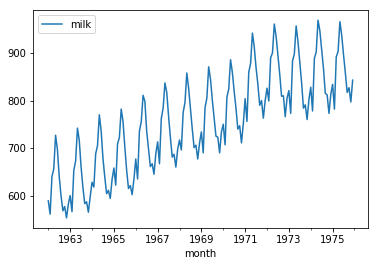

In [6]:
milk.plot()

In [7]:
milk.head(2)

,milk
month,
1962-01-01,589
1962-02-01,561


In [8]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk.milk)

(-1.3038115874221219,
 0.6274267086030352,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [9]:
month = milk.index.to_series()

In [10]:
milk_per_day = milk.milk / month.dt.days_in_month

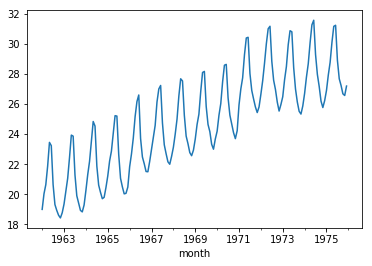

In [11]:
milk_per_day.plot()

In [12]:
milk_per_day.sum()

4166.326661899466

1 - сезонность ошибка тренд цикл,+
2 - автокоррел+
3 - a, e_t, p предыдущщих значений+
4 - ф,a, O+
5 - аналих частичной автокоррекции+
6 - 1+
7 - 2+
8 - 12 -1
9 - 45 - 7

In [13]:
milk = pd.read_csv('monthly-milk-production2.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [15]:
month = milk.index.to_series()
milk_per_day = milk.milk / month.dt.days_in_month

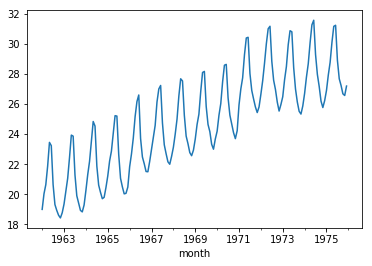

In [16]:
milk_per_day.plot()

In [18]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk.milk)

(-1.3038115874221219,
 0.6274267086030352,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [21]:
milk['daily']=milk_per_day

In [23]:
milk.head(5)

,milk,daily
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613


In [24]:
sm.tsa.stattools.adfuller(milk.daily)

(-1.1798216373266124,
 0.6822151513081405,
 12,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.5708067458066353)

In [32]:
daily_diff1 = milk.daily - milk.daily.shift(1)

In [38]:
sm.tsa.stattools.adfuller(daily_diff1[1:])

(-2.7594694762289262,
 0.0643005465417445,
 11,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.1539973381055688)

In [39]:
daily_diff2 = daily_diff1 - daily_diff1.shift(1)

In [41]:
sm.tsa.stattools.adfuller(daily_diff2[2:])

(-48.67368687487005,
 0.0,
 10,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 5.6904137358866365)

In [44]:
milk['daily_diff12'] = milk.daily - milk.daily.shift(12)

In [47]:
sm.tsa.stattools.adfuller(milk['daily_diff12'][12:])

(-2.1594860932888076,
 0.22127672658830383,
 12,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -25.225679141303317)

In [48]:
daily_diff13 = daily_diff1 - daily_diff1.shift(12)

In [50]:
sm.tsa.stattools.adfuller(daily_diff13 [13:])

(-5.4813263347969245,
 2.280845551803768e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -20.90513750989237)

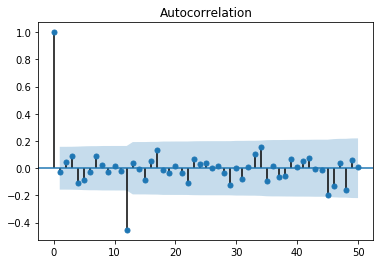

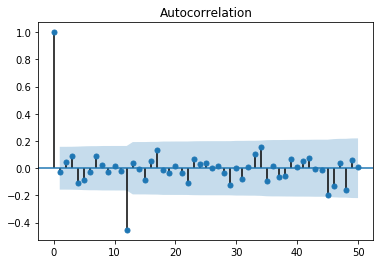

In [55]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(daily_diff13 [13:].values.squeeze(), lags=50)

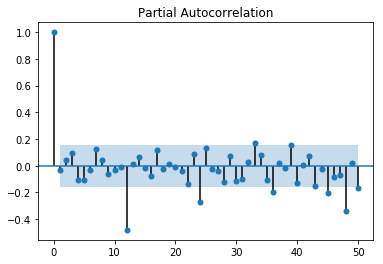

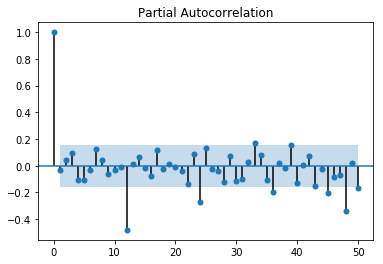

In [56]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(daily_diff13 [13:].values.squeeze(), lags=50)